<a href="https://www.coursera.org/professional-certificates/ibm-data-science?"><img src="https://blog.coursera.org/wp-content/uploads/2018/08/Image.1534447201044.png" align="center"></a>

<h2 align="center">Peer-graded Assignment: Segmenting and Clustering Neighborhoods in Toronto</h2>

<h2 align="center">Author: Diego Ignacio López Orellana</h2>

<hr>

## Notebook 3/3: Explore and cluster the neighborhoods in Toronto, using ***k-Means* Clustering Model**

This Jupyter Notebook consists in using the **Foursquare API** to explore the different neighborhoods in Toronto, Canada.

Then, we will use the **explore** function to get the most common venues from each neighborhood in Toronto which name contains **Toronto**. And then, use these venues to group the different neighborhoods into clusters, by running the *k-Means* clustering algorithm.

Next, using the **Folium** library, we will visualize the neighborhoods in Toronto, Canada, and their clusters obtained from the *k-Means* model.

Finally, this Jupyter Notebook will be submitted to my **GitHub Coursera Capstone's repository**, which is available on the following [link](https://github.com/diegolopez92/Coursera_Capstone).

## I. Download, install and import dependencies and libraries

In [1]:
import numpy as np # Math library to work with N-dimensional arrays in Python.

import pandas as pd # Library for manipulating and analyzing data (including the creation of Dataframes)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # Library to handle JSON files

!conda install -c conda-forge geopy --yes # Install geopy, Python client for popular geocoding web services.
from geopy.geocoders import Nominatim # Nominatim: geocodifier which converts an address into its Latitude and Longitude values.

import requests # Library to handle HTTP requests

# Matplotlib with its associated plotting modules (cm and colors)
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-Means class from sklearn.cluster module
from sklearn.cluster import KMeans

# Install and import Folium, map rendering library
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Libraries imported.


### II. Import *toronto_postcodes* **.CSV file** into a *Pandas dataframe*

In [71]:
toronto_postalcodes = pd.read_csv('toronto_postcodes.csv') # Read the .csv file into a dataframe called 'toronto_postalcodes'
toronto_postalcodes.head(10) # Show the first 10 rows of the dataframe 'toronto_postalcodes'

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.75188,-79.33036
1,M4A,North York,Victoria Village,43.73042,-79.31282
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65514,-79.36265
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.72321,-79.45141
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.66449,-79.39302
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.66277,-79.52831
6,M1B,Scarborough,"Malvern, Rouge",43.81153,-79.19552
7,M3B,North York,Don Mills,43.74929,-79.36169
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.70794,-79.31160
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.65736,-79.37818


Now, let's show the names and number of distinct Boroughs that exist in Toronto, Canada (considering Old Toronto's subdivision).

In [72]:
print(toronto_postalcodes['Borough'].unique())

['North York' 'Downtown Toronto' 'Etobicoke' 'Scarborough' 'East York'
 'York' 'East Toronto' 'West Toronto' 'Central Toronto' 'Mississauga']


In [73]:
print("There are {} Boroughs in Toronto, Canada, considering Old Toronto's subdivision.".format(len(toronto_postalcodes['Borough'].unique())))

There are 10 Boroughs in Toronto, Canada, considering Old Toronto's subdivision.


### **Important note**: actually, there are 6 Boroughs in Toronto. But the Old Toronto Borough can be subdivided as follows:
#### **- Downtown Toronto**
#### **- East Toronto**
#### **- West Toronto**
#### **- Central Toronto**

### And also, **Missisauga** sometimes is not considered a Toronto's Borough, altough the urban growth of Missisauga and Toronto is totally linked. 

### III. Use **Geopy** library to get the Latitude and Longitude values of Toronto, Canada.

As known, to define a geocoder object, first we need to assign a name to its agent. As we are exploring Toronto, we will name it *toronto_explorer*.

In [74]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="toronto_explorer")
localization = geolocator.geocode(address)
latitude = localization.latitude
longitude = localization.longitude
print('The Latitude and Longitude coordinates of Toronto, Canada are respectively: {}, {}.'.format(latitude, longitude))

The Latitude and Longitude coordinates of Toronto, Canada are respectively: 43.6534817, -79.3839347.


### IV. Create a **map of Toronto, with neighborhoods superimposed on it** according to its postal code Latitude and Longitude values.

Before creating it, let's correct the coordinates (Longitude, Latitude) of the Canada Post Gateway Processing Centre (Missisauga, Canada). This has the objective to show that place correctly in Toronto's map.

In [75]:
# Correcting Longitude and Latitude coordinates of the Canada Post Gateway Processing Centre (Missisauga, Canada)
toronto_postalcodes.loc[76, 'Latitude'] = 43.6369656
toronto_postalcodes.loc[76, 'Longitude'] = -79.615819

In [76]:
# Create a map of Toronto according to its Latitude and Longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# Add neighborhoods markers to 'map_toronto' map
for borough, neighborhood, lat, lng in zip(toronto_postalcodes['Borough'], toronto_postalcodes['Neighborhood'], toronto_postalcodes['Latitude'], toronto_postalcodes['Longitude']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#c40a29',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)
    
map_toronto

### V. Create a **new dataframe with neighborhoods from Old Toronto**, and visualize the borough in a **Folium** map

First of all, let's check the data type for each column in *toronto_postalcodes* dataframe.

In [77]:
toronto_postalcodes.dtypes

Postal Code      object
Borough          object
Neighborhood     object
Latitude        float64
Longitude       float64
dtype: object

Now, let's create a new dataframe called *oldtoronto_df*, which contains only the neighborhoods from Old Toronto *(Downtown Toronto, East Toronto, West Toronto, Central Toronto)*

This is done with the objective of segment and cluster only the mentioned neighborhoods to analyze them: the **final objective of this Peer-graded Assignment**.

To do this, we convert the *Borough column* from *toronto_postalcodes* from object to string type, and then filter the last dataframe by the condition that the boroughs **must contain the word 'Toronto' on its name**.

In [78]:
oldtoronto_df = toronto_postalcodes[toronto_postalcodes['Borough'].astype(str).str.contains('Toronto')].reset_index(drop=True)

In [79]:
# Show the first 10 rows of oldtoronto_df dataframe
oldtoronto_df.head(10)

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65514,-79.36265
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.66449,-79.39302
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.65736,-79.37818
3,M5C,Downtown Toronto,St. James Town,43.65143,-79.37557
4,M4E,East Toronto,The Beaches,43.67703,-79.29542
5,M5E,Downtown Toronto,Berczy Park,43.64531,-79.37368
6,M5G,Downtown Toronto,Central Bay Street,43.65609,-79.38493
7,M6G,Downtown Toronto,Christie,43.66878,-79.42071
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.64970,-79.38258
9,M6H,West Toronto,"Dufferin, Dovercourt Village",43.66509,-79.43871


In [80]:
# Print the dimensions of oldtoronto_df dataframe
print('The dimensions of oldtoronto_df dataframe are {} rows, {} columns.'.format(oldtoronto_df.shape[0], oldtoronto_df.shape[1]))

The dimensions of oldtoronto_df dataframe are 39 rows, 5 columns.


As before, we get the Latitude and Longitude coordinates of *Old Toronto* Borough.

In [81]:
address = 'Old Toronto, Ontario'

geolocator = Nominatim(user_agent="toronto_explorer")
localization = geolocator.geocode(address)
latitude = localization.latitude
longitude = localization.longitude

print('The Latitude and Longitude coordinates of Old Toronto are {}, {}.'.format(latitude, longitude))

The Latitude and Longitude coordinates of Old Toronto are 43.67368315, -79.37984349253107.


Similarly to what we did with Toronto city, now we map the neighborhoods from Old Toronto Borough and visualize them in a *Folium* map.

In [82]:
# Create a map of Old Toronto Borough according to its Latitude and Longitude values
map_oldtoronto = folium.Map(location=[latitude, longitude], zoom_start=12)

# Add neighborhoods markers to 'map_oldtoronto' map
for borough, neighborhood, lat, lng in zip(oldtoronto_df['Borough'], oldtoronto_df['Neighborhood'], oldtoronto_df['Latitude'], oldtoronto_df['Longitude']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#c40a29',
        fill_opacity=0.7,
        parse_html=False).add_to(map_oldtoronto)
    
map_oldtoronto

### VI. Use the **Foursquare API** to explore neighborhoods before segmenting them

Create variables for credentials and version of Foursquare API

In [83]:
CLIENT_ID = 'N0DLE4BEY4SCBQKDQ4E0LRGMI555PYEJRXB5TGW3V42PD2DJ' # Foursquare ID
CLIENT_SECRET = 'OA43NACHWCBJXC4LKRN5ZR4PRIEUDWOOFQKRX3B0KMB1UCSB' # Foursquare Secret
VERSION = '20180605' # Foursquare API Version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET: ' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: N0DLE4BEY4SCBQKDQ4E0LRGMI555PYEJRXB5TGW3V42PD2DJ
CLIENT_SECRET: OA43NACHWCBJXC4LKRN5ZR4PRIEUDWOOFQKRX3B0KMB1UCSB


### Before exploring all the neighborhoods from Old Toronto, let's explore **Regent Park and Harbourfront** ones.

In [84]:
# Get neighborhoods' names
oldtoronto_df.loc[0, 'Neighborhood']

'Regent Park, Harbourfront'

In [85]:
# Get the Latitude and Longitude values for the previous neighborhoods
neighborhoods_latitude = oldtoronto_df.loc[0, 'Latitude'] # Regent Park and Harbourfront neighborhoods Latitude value
neighborhoods_longitude = oldtoronto_df.loc[0, 'Longitude'] # Regent Park and Harbourfront neighborhoods Longitude value

neighborhoods_names = oldtoronto_df.loc[0, 'Neighborhood'] # Neighborhood names: Regent Park and Harbourfront

print('The neighborhoods are {} and its Latitude and Longitude values are: {}, {}.'.format(neighborhoods_names,
                                                                                           round(neighborhoods_latitude, 5),
                                                                                           round(neighborhoods_longitude, 5)))

The neighborhoods are Regent Park, Harbourfront and its Latitude and Longitude values are: 43.65514, -79.36265.


#### Now, let's get the **top 100 venues from Regent Park and Harbourfront** within a radial distance of 500 meters.

#### First of all, we **create a URL** that will be sent later as an HTTP request to the Foursquare database.

In [86]:
RADIUS = 500 # Define radius of 500 meters
LIMIT = 100 # Limit of 100 venues to be returned by Foursquare API

# Create URL named url
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, neighborhoods_latitude, neighborhoods_longitude, VERSION, RADIUS, LIMIT)
url # Display URL named 'url'

'https://api.foursquare.com/v2/venues/explore?client_id=N0DLE4BEY4SCBQKDQ4E0LRGMI555PYEJRXB5TGW3V42PD2DJ&client_secret=OA43NACHWCBJXC4LKRN5ZR4PRIEUDWOOFQKRX3B0KMB1UCSB&ll=43.655140000000074,-79.36264999999997&v=20180605&radius=500&limit=100'

#### Send the **GET** request and return it as a **JSON file** called **results**.

In [87]:
results=requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f3d9f12be770f153b284ecc'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Corktown',
  'headerFullLocation': 'Corktown, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 22,
  'suggestedBounds': {'ne': {'lat': 43.659640004500076,
    'lng': -79.35644190916513},
   'sw': {'lat': 43.65063999550007, 'lng': -79.36885809083482}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '54ea41ad498e9a11e9e13308',
       'name': 'Roselle Desserts',
       'location': {'address': '362 King St E',
        'crossStreet': 'Trinity St',
        'lat': 43.653446723052674,
        'lng': -79.3620167174383,
        'labeledLatLngs': [{'label'

#### Now, we will create the **get_category_type** function that extracts the category of each venue.

In [88]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Next, we will clean the *'results' JSON file* and pass it into a *Pandas* dataframe.

In [89]:
venues = results['response']['groups'][0]['items']

nearest_venues = pd.json_normalize(venues) # Converts JSON file into a Pandas dataframe

# Filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearest_venues = nearest_venues.loc[:, filtered_columns]

# Filter the category for each row
nearest_venues['venue.categories'] = nearest_venues.apply(get_category_type, axis=1)

# Clean columns
nearest_venues.columns = [col.split(".")[-1] for col in nearest_venues.columns]

nearest_venues.head()

,name,categories,lat,lng
0,Roselle Desserts,Bakery,43.653447,-79.362017
1,Tandem Coffee,Coffee Shop,43.653559,-79.361809
2,Figs Breakfast & Lunch,Breakfast Spot,43.655675,-79.364503
3,The Yoga Lounge,Yoga Studio,43.655515,-79.364955
4,Body Blitz Spa East,Spa,43.654735,-79.359874


#### After that, we get the number of venues returned by Foursquare API, for **Regent Park and Harbourfront neighborhoods**.

In [90]:
print('{} venues were returned by Foursquare API for Regent Park and Harbourfront neighborhoods.'.format(nearest_venues.shape[0]))

22 venues were returned by Foursquare API for Regent Park and Harbourfront neighborhoods.


### VII. Explore all the neighborhoods in Old Toronto Borough

#### Now, we **create a function** with make calls to the Foursquare API and create a dataframe called *neighs_oldtoronto_df* which contains information of each neighborhood and its nearest venues.

In [91]:
def getNearestVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        # Create the API request URL (called 'url')
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            radius,
            LIMIT)
        
        # Make the GET request to call the Foursquare database
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # Return only relevant information (latitude, longitude, category, name) for each nearby venue
        venues_list.append([(
            name,
            lat,
            lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])
        
    nearest_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearest_venues.columns = ['Neighborhood',
                   'Neighborhood Latitude',
                   'Neighborhood Longitude',
                   'Venue',
                   'Venue Latitude',
                   'Venue Longitude',
                   'Venue Category']
    
    return(nearest_venues)

#### Now, we create an instance to run the above function on each neighborhood and venue. The dataframe created is called *oldtoronto_venues*.

In [92]:
oldtoronto_venues = getNearestVenues(names=oldtoronto_df['Neighborhood'],
                                     latitudes=oldtoronto_df['Latitude'],
                                     longitudes=oldtoronto_df['Longitude']
                                    )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West,  Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport


#### Now, we print the dimensions of *oldtoronto_venues* dataframe.

In [93]:
print('The dimensions of oldtoronto_venues dataframe are {} rows, {} columns.'.format(oldtoronto_venues.shape[0], oldtoronto_venues.shape[1]))

The dimensions of oldtoronto_venues dataframe are 1751 rows, 7 columns.


#### And let's show the first 10 rows of the same dataframe.

In [94]:
oldtoronto_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65514,-79.36265,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65514,-79.36265,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65514,-79.36265,Figs Breakfast & Lunch,43.655675,-79.364503,Breakfast Spot
3,"Regent Park, Harbourfront",43.65514,-79.36265,The Yoga Lounge,43.655515,-79.364955,Yoga Studio
4,"Regent Park, Harbourfront",43.65514,-79.36265,Body Blitz Spa East,43.654735,-79.359874,Spa
5,"Regent Park, Harbourfront",43.65514,-79.36265,Rooster Coffee,43.651900,-79.365609,Coffee Shop
6,"Regent Park, Harbourfront",43.65514,-79.36265,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
7,"Regent Park, Harbourfront",43.65514,-79.36265,Sumach Espresso,43.658135,-79.359515,Coffee Shop
8,"Regent Park, Harbourfront",43.65514,-79.36265,Alumnae Theatre,43.652756,-79.364753,Theater
9,"Regent Park, Harbourfront",43.65514,-79.36265,Berkeley Church,43.655123,-79.365873,Event Space


#### Next, let's check how many venues belong to each neighborhood in the *oldtoronto_venues* dataframe.

In [95]:
oldtoronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,67,67,67,67,67,67
"Brockton, Parkdale Village, Exhibition Place",85,85,85,85,85,85
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",100,100,100,100,100,100
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",73,73,73,73,73,73
Central Bay Street,75,75,75,75,75,75
Christie,11,11,11,11,11,11
Church and Wellesley,75,75,75,75,75,75
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,26,26,26,26,26,26


#### And finally, let's check the **number of unique categories** curated from all the returned venues.

In [96]:
print('There are {} unique categories curated from all the venues in the dataframe.'.format(len(oldtoronto_venues['Venue Category'].unique())))

There are 231 unique categories curated from all the venues in the dataframe.


### VIII. Analyze all the neighborhoods in Old Toronto Borough

First, we will perform **One Hot encoding** to separate each venue category into a column in a new dataframe.

This is done to achieve the following objectives:

**1. Convert categorical data (Venue Category) into numerical data**.

**2. Analyze which venues from each neighborhood, belong to each venue category in Old Toronto Borough**.

In [97]:
# Perform One Hot encoding
oldtoronto_onehot = pd.get_dummies(oldtoronto_venues[['Venue Category']], prefix="", prefix_sep="")

# Add neighborhood column back to dataframe
oldtoronto_onehot['Neighborhood Name'] = oldtoronto_venues['Neighborhood']

# Move 'Neighborhood Name' column to the first column
columns_list = [oldtoronto_onehot.columns[-1]] + list(oldtoronto_onehot.columns[:-1])
oldtoronto_onehot = oldtoronto_onehot[columns_list]

# Show the first 10 rows from oldtoronto_onehot dataframe
oldtoronto_onehot.head(10)

,Neighborhood Name,Accessories Store,Adult Boutique,Afghan Restaurant,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Camera Store,Campground,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,College Theater,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hawaiian Restaurant,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recreation Center,Residential Building (Apartment / Condo),Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Repair,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

#### Then, we get the new dataframe *oldtoronto_onehot* dimensions.

In [98]:
print('The dimensions of oldtoronto_onehot dataframe are {} rows, {} columns.'.format(oldtoronto_onehot.shape[0], oldtoronto_onehot.shape[1]))

The dimensions of oldtoronto_onehot dataframe are 1751 rows, 232 columns.


#### Now, we group the different venues by *Neighborhood Name* column and then take the **mean of the relative frequency of ocurrence** of each category.

In [99]:
oldtoronto_groups = oldtoronto_onehot.groupby('Neighborhood Name').mean().reset_index()
oldtoronto_groups

,Neighborhood Name,Accessories Store,Adult Boutique,Afghan Restaurant,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Camera Store,Campground,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,College Theater,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hawaiian Restaurant,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recreation Center,Residential Building (Apartment / Condo),Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Repair,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014925,0.000000,0.000000,0.000000,0.000000,0.014925,0.000000,0.014925,0.029851,0.000000,0.000000,0.014925,0.029851,0.000000,0.000000,0.000000,0.014925,0.000000,0.000000,0.000000,0.000000,0.00,0.029851,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.029851,0.000000,0.000000,0.000000,0.000000,0.029851,0.000000,0.000000,0.00,0.000000,0.014925,0.029851,0.089552,0.000000,0.000000,0.00,0.000000,0.00,0.014925,0.000000,0.014925,0.000000,0.000000,0.00,0.014925,0.000000,0.000000,0.000000,0.000000,0.014925,0.000000,0.000000,0.014925,0.000000,0.000000,0.000000,0.000000,0.000000,0.014925,0.000000,0.000000,0.000000,0.0000

#### And we get the shape of this new dataframe *oldtoronto_groups*

In [100]:
print('The dimensions of oldtoronto_groups dataframe are {} rows, {} columns.'.format(oldtoronto_groups.shape[0], oldtoronto_groups.shape[1]))

The dimensions of oldtoronto_groups dataframe are 39 rows, 232 columns.


#### Now, we print each neighborhood from Old Toronto together with its top 5 common venues.

In [101]:
top_venues_neigh = 5

for hood in oldtoronto_groups['Neighborhood Name']:
    print("----"+hood+"----")
    temp = oldtoronto_groups[oldtoronto_groups['Neighborhood Name'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(top_venues_neigh))
    print('\n')

----Berczy Park----
                Venue  Frequency
0         Coffee Shop       0.09
1          Restaurant       0.04
2                Café       0.03
3  Seafood Restaurant       0.03
4         Cheese Shop       0.03


----Brockton, Parkdale Village, Exhibition Place----
         Venue  Frequency
0         Café       0.07
1  Coffee Shop       0.06
2          Bar       0.06
3   Restaurant       0.05
4    Gift Shop       0.04


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
                Venue  Frequency
0         Coffee Shop       0.10
1               Hotel       0.05
2  Italian Restaurant       0.04
3          Restaurant       0.03
4                 Bar       0.03


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
                Venue  Frequency
0         Coffee Shop       0.08
1  Italian Restaurant       0.05
2                 Bar       0.04
3                Café       0

#### Now, we have to insert the previous data into a *Pandas* dataframe.

#### The first step is create a function **to order the top 5 venues from each neighborhood in descending order**.

In [102]:
def return_most_common_venues(row, top_venues_neigh):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_venues_neigh]

#### Then, we create a new dataframe called *oldtoronto_neighvenues_sorted*, which contains the **top 10 venues for each neighborhood in Old Toronto**.

In [103]:
top_venues_neigh = 10

indicators = ['st', 'nd', 'rd']

# Create columns in an ordinal way, according to the number of top venues
columns = ['Neighborhood Name']
for ind in np.arange(top_venues_neigh):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# Create a new dataframe called oldtoronto_neighvenues_sorted
oldtoronto_neighvenues_sorted = pd.DataFrame(columns=columns)
oldtoronto_neighvenues_sorted['Neighborhood Name'] = oldtoronto_groups['Neighborhood Name']

for ind in np.arange(oldtoronto_groups.shape[0]):
    oldtoronto_neighvenues_sorted.iloc[ind, 1:] = return_most_common_venues(oldtoronto_groups.iloc[ind, :], top_venues_neigh)
    
oldtoronto_neighvenues_sorted.head(10) # Show the first 10 rows of oldtoronto_neighvenues_sorted dataframe

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Restaurant,Italian Restaurant,Seafood Restaurant,Bakery,Lounge,Farmers Market,Cocktail Bar,Café,Cheese Shop
1,"Brockton, Parkdale Village, Exhibition Place",Café,Coffee Shop,Bar,Restaurant,Sandwich Place,Gift Shop,Supermarket,Japanese Restaurant,Furniture / Home Store,French Restaurant
2,"Business reply mail Processing Centre, South C...",Coffee Shop,Hotel,Italian Restaurant,Restaurant,Bar,Asian Restaurant,Sushi Restaurant,Salon / Barbershop,Pub,Burrito Place
3,"CN Tower, King and Spadina, Railway Lands, Har...",Coffee Shop,Italian Restaurant,Bar,Café,Restaurant,Spa,Speakeasy,Sandwich Place,Bakery,Lounge
4,Central Bay Street,Coffee Shop,Clothing Store,Electronics Store,Sandwich Place,Plaza,Restaurant,Bubble Tea Shop,Cosmetics Shop,Hotel,Middle Eastern Restaurant
5,Christie,Café,Grocery Store,Italian Restaurant,Playground,Coffee Shop,Baby Store,Candy Store,Athletics & Sports,Yoga Studio,Dumpling Restaurant
6,Church and Wellesley,Coffee Shop,Japanese Restaurant,Gay Bar,Restaurant,Sushi Restaurant,Café,Bubble Tea Shop,Dance Studio,Men's Store,Hotel
7,"Commerce Court, Victoria Hotel",Coffee Shop,Restaurant,Café,Hotel,Gym,American Restaurant,Japanese Restaurant,Beer Bar,Seafood Restaurant,Italian Restaurant
8,Davisville,Dessert Shop,Sandwich Place,Coffee Shop,Italian Restaurant,Pizza Place,Café,Gas Station,Indoor Play Area,Thai Restaurant,Indian Restaurant
9,Davisville North,Breakfast Spot,Hotel,Food & Drink Shop,Park,Department Store,Donut Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm


### IX. Cluster neighborhoods in Old Toronto Borough, using **k-Means Clustering Model**

In this part, we will cluster and segment the neighborhoods in Old Toronto Boroughs into different groups, according to the results of the **k-Means Clustering Model**.

To determine which value of **K** is optimal to use in the model, we will use the **Elbow method**. It consists in running the **k-Means Model** for a range of **K clusters (e.g. from 1 to 10)**. Then we calculate, for each number of clusters, its respective **Sum of Squared Errors (SSE)** between each point in a cluster and its respective centroid within it. And finally, we sum the errors of all the clusters to get the **SSE value** and plot them (**x** coordinates for K values, **y** coordinates for Mean distances to data points from cluster centroids).

When we apply the **Elbow method**, as we know in advance that increasing **K** will always decrease the error or **SSE value**, then the elbow point (and therefore the **K value to use in k-Means Model**) is determined **where the rate of decrease sharply shifts**.

#### Now, we will run **k-Means** 12 times (K from 1 to 10), to determine the **optimal K value using the Elbow method**.

In [104]:
sum_squared_errors=[] # List that contains the SSE values for each 'K' magnitude
K=range(1, 11) # Sequence of K values from 1 to 10

import matplotlib.pyplot as plt # Plotting library, which uses the matplotlib.pyplot interface for a quick and easy generation of plots
%matplotlib inline 

oldtoronto_groups_cluster = oldtoronto_groups.drop('Neighborhood Name', axis=1) # Dataframe which contains the values of the neighborhoods to be clustered

for k_value in K:
    kmeans = KMeans(init="k-means++", n_clusters=k_value, n_init=20, random_state=0)
    kmeans.fit(oldtoronto_groups_cluster)
    sum_squared_errors.append(kmeans.inertia_) # Get the Sum of Squared Errors (SSE) for each 'K' value

#### Next, we plot the SSE values with respect to each **K value**, to find its optimal value.

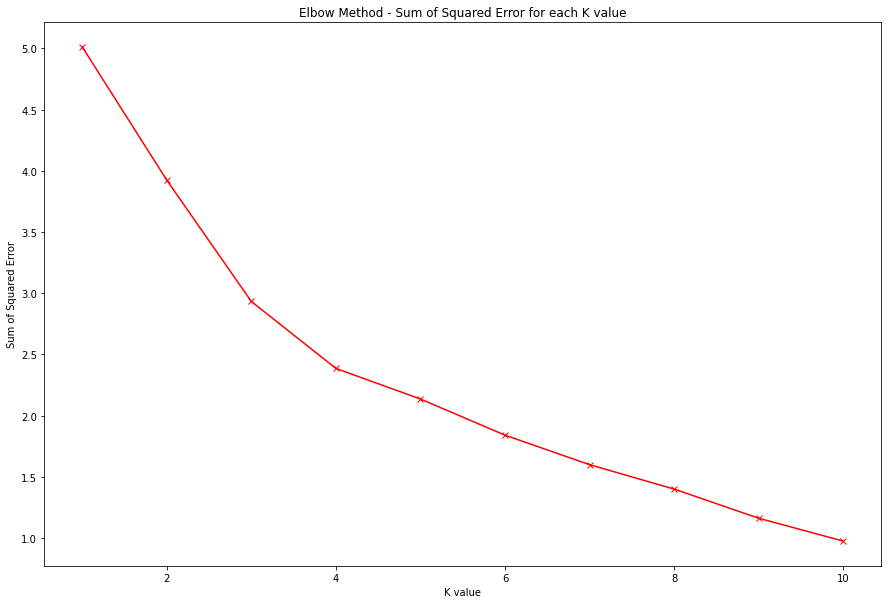

In [105]:
plt.figure(figsize=(15,10))
plt.plot(K, sum_squared_errors, 'rx-')
plt.xlabel('K value')
plt.ylabel('Sum of Squared Error')
plt.title('Elbow Method - Sum of Squared Error for each K value')
plt.show()

### Therefore, as the rate of SSE decrease sharply shifts after K = 4, then our **optimal value for the number of clusters** using the Elbow method is **K = 4**.

#### Next, after we found our optimal K, we run again the **k-Means** for the optimal number of clusters to retrieve **(K = 4)**.

In [106]:
k_optimal=4

# Run k-Means Clustering Model for an optimal K value of 4
kmeans_optimal = KMeans(init="k-means++", n_clusters=k_optimal, n_init=20, random_state=0).fit(oldtoronto_groups_cluster)

# Check cluster labels for each of the 39 neighborhoods in the dataframe
kmeans_optimal.labels_[:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 0, 3, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Now, we create a new dataframe that contains the **cluster label and the top 10 venues for each neighborhood** as well.

In [107]:
# Add clustering labels to the 'oldtoronto_neighvenues_sorted' dataframe
oldtoronto_neighvenues_sorted.insert(0, 'Cluster Label', kmeans_optimal.labels_)

oldtoronto_merged_df = oldtoronto_df
oldtoronto_merged_df.columns = ['Postal Code', 'Borough', 'Neighborhood Name', 'Latitude', 'Longitude']

# Merge oldtoronto_merged_df dataframe with oldtoronto_neighvenues_sorted dataframe,
# to add geographical coordinates (Latitude, Longitude) for each neighborhood
oldtoronto_merged_df = oldtoronto_merged_df.join(oldtoronto_neighvenues_sorted.set_index('Neighborhood Name'), on='Neighborhood Name')

oldtoronto_merged_df.head(10) # Show the first 10 rows of the dataframe

,Postal Code,Borough,Neighborhood Name,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65514,-79.36265,0,Coffee Shop,Breakfast Spot,Restaurant,Yoga Studio,Theater,Event Space,Electronics Store,Spa,Food Truck,Distribution Center
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.66449,-79.39302,0,Coffee Shop,Park,Sandwich Place,Café,Concert Hall,Clothing Store,Cosmetics Shop,Salon / Barbershop,Chinese Restaurant,Restaurant
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.65736,-79.37818,0,Coffee Shop,Clothing Store,Café,Middle Eastern Restaurant,Cosmetics Shop,Hotel,Japanese Restaurant,Bookstore,Ramen Restaurant,Diner
3,M5C,Downtown Toronto,St. James Town,43.65143,-79.37557,0,Coffee Shop,Seafood Restaurant,Café,Cosmetics Shop,American Restaurant,Cocktail Bar,Restaurant,Farmers Market,Hotel,Department Store
4,M4E,East Toronto,The Beaches,43.67703,-79.29542,0,Health Food Store,Pub,Trail,Neighborhood,Yoga Studio,Distribution Center,Farmers Market,Farm,Falafel Restaurant,Event Space
5,M5E,Downtown Toronto,Berczy Park,43.64531,-79.37368,0,Coffee Shop,Restaurant,Italian Restaurant,Seafood Restaurant,Bakery,Lounge,Farmers Market,Cocktail Bar,Café,Cheese Shop
6,M5G,Downtown Toronto,Central Bay Street,43.65609,-79.38493,0,Coffee Shop,Clothing Store,Electronics Store,Sandwich Place,Plaza,Restaurant,Bubble Tea Shop,Cosmetics Shop,Hotel,Middle Eastern Restaurant
7,M6G,Downtown Toronto,Christie,43.66878,-79.42071,0,Café,Grocery Store,Italian Restaurant,Playground,Coffee Shop,Baby Store,Candy Store,Athletics & Sports,Yoga Studio,Dumpling Restaurant
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.64970,-79.38258,0,Coffee Shop,Café,Gym,Hotel,Japanese Restaurant,Steakhouse,Asian Restaurant,Salad Place,American Restaurant,Restaurant
9,M6H,West Toronto,"Dufferin, Dovercourt Village",43.66509,-79.43871,0,Park,Art Gallery,Middle Eastern Restaurant,Café,Furniture / Home Store,Bank,Bakery,Pizza Place,Bar,Gym / Fitness Center


Finally, we will visualize the clustered neighborhoods in a **Folium map**.

In [109]:
# Create toronto_clusters map
toronto_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# Set color scheme for the clusters
x = np.arange(k_optimal)
ys = [i + x + (i*x)**2 for i in range(k_optimal)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Superimpose markers over toronto_clusters map
markers_colors = []
for lat, lng, neigh, cluster in zip(oldtoronto_merged_df['Latitude'], oldtoronto_merged_df['Longitude'], oldtoronto_merged_df['Neighborhood Name'], oldtoronto_merged_df['Cluster Label']):
    label = folium.Popup(str(neigh) + 'Cluster' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(toronto_clusters)
    
toronto_clusters

### X. **Segment and label the clusters** according to their most common venues

In this final task, we will **segment the neighborhoods according to their cluster labels and name each one of them**. This will be done with respect to their most common venues.

### **Cluster 1: Touristic, Commercial and Cultural Cluster**

These neighborhoods share, as most common venues: coffee shops, restaurants from all over the world (Italy, China, etc.), art galleries, event spaces, parks and many other touristic/cultural places where locals and foreigners can visit while they enjoy a coffee to continue their walk.

And at the same time, they can shop in several stores where they can buy clothes, electronics, candies or even souvenirs from those neighborhoods.

In [117]:
oldtoronto_merged_df.loc[oldtoronto_merged_df['Cluster Label'] == 0, oldtoronto_merged_df.columns[[2] + list(range(6, oldtoronto_merged_df.shape[1]))]]

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Regent Park, Harbourfront",Coffee Shop,Breakfast Spot,Restaurant,Yoga Studio,Theater,Event Space,Electronics Store,Spa,Food Truck,Distribution Center
1,"Queen's Park, Ontario Provincial Government",Coffee Shop,Park,Sandwich Place,Café,Concert Hall,Clothing Store,Cosmetics Shop,Salon / Barbershop,Chinese Restaurant,Restaurant
2,"Garden District, Ryerson",Coffee Shop,Clothing Store,Café,Middle Eastern Restaurant,Cosmetics Shop,Hotel,Japanese Restaurant,Bookstore,Ramen Restaurant,Diner
3,St. James Town,Coffee Shop,Seafood Restaurant,Café,Cosmetics Shop,American Restaurant,Cocktail Bar,Restaurant,Farmers Market,Hotel,Department Store
4,The Beaches,Health Food Store,Pub,Trail,Neighborhood,Yoga Studio,Distribution Center,Farmers Market,Farm,Falafel Restaurant,Event Space
5,Berczy Park,Coffee Shop,Restaurant,Italian Restaurant,Seafood Restaurant,Bakery,Lounge,Farmers Market,Cocktail Bar,Café,Cheese Shop
6,Central Bay Street,Coffee Shop,Clothing Store,Electronics Store,Sandwich Place,Plaza,Restaurant,Bubble Tea Shop,Cosmetics Shop,Hotel,Middle Eastern Restaurant
7,Christie,Café,Grocery Store,Italian Restaurant,Playground,Coffee Shop,Baby Store,Candy Store,Athletics & Sports,Yoga Studio,Dumpling Restaurant
8,"Richmond, Adelaide, King",Coffee Shop,Café,Gym,Hotel,Japanese Restaurant,Steakhouse,Asian Restaurant,Salad Place,American Restaurant,Restaurant
9,"Dufferin, Dovercourt Village",Park,Art Gallery,Middle Eastern Restaurant,Café,Furniture / Home Store,Bank,Bakery,Pizza Place,Bar,Gym / Fitness Center


### **Cluster 2: Financial Cluster**

These are the neighborhoods where businessmen and businesswomen from Old Toronto Borough go to work and spend most of their day between their responsibilities, businesses, deals and sports days/celebrations in the nearby parks.

As shown in the dataframe, the most common types of venues are: parks, business services, event spaces, distribution centers and restaurants. Those are the kind of places which you can find in most of the Financial Districts around the world.

In [118]:
oldtoronto_merged_df.loc[oldtoronto_merged_df['Cluster Label'] == 1, oldtoronto_merged_df.columns[[2] + list(range(6, oldtoronto_merged_df.shape[1]))]]

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Lawrence Park,Park,Business Service,Yoga Studio,Dog Run,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space
21,"Forest Hill North & West, Forest Hill Road Park",Park,Yoga Studio,Distribution Center,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space,Ethiopian Restaurant


### **Cluster 3: Services Cluster**

In Roselawn neighborhood, from Old Toronto neighborhood, there are plenty of service venues where people can buy a wide variety of products. They vary from antiques in the Flea Market to hamburgers, french fries and soda in a Fast Food Restaurant.

Due to its big amount of shop where people can buy almost everything is that Roselawn's cluster is labeled as a Services one.

In [119]:
oldtoronto_merged_df.loc[oldtoronto_merged_df['Cluster Label'] == 2, oldtoronto_merged_df.columns[[2] + list(range(6, oldtoronto_merged_df.shape[1]))]]

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Roselawn,Home Service,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store


### **Cluster 4: Residential Cluster**

On this cluster, there is a mix of many different places, where the residential buildings (such as Apartments or Condos) are among the most common venues. Not only that, the most common venues from the neighborhoods in this cluster are places and services nearby residential zones, so people from those neighborhoods can do all their activities without moving from the places where they live.

Therefore, people can go for example, to a Park, Gym, Convenience Store, Restaurant or even to big events in their same neighborhood.

In [120]:
oldtoronto_merged_df.loc[oldtoronto_merged_df['Cluster Label'] == 3, oldtoronto_merged_df.columns[[2] + list(range(6, oldtoronto_merged_df.shape[1]))]]

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,"High Park, The Junction South",Convenience Store,Park,Residential Building (Apartment / Condo),Distribution Center,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space,Ethiopian Restaurant
29,"Moore Park, Summerhill East",Convenience Store,Gym,Distribution Center,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space,Ethiopian Restaurant
